In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1" #model will be trained on GPU 1

In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.filters import threshold_otsu
import numpy as np
from glob import glob
from scipy import misc 
from matplotlib.patches import Circle,Ellipse
from matplotlib.patches import Rectangle
import os
from PIL import Image

In [3]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model
from tensorflow.keras.optimizers import RMSprop
#from keras.optimizers import RMSprop
#from keras.layers.normalization import BatchNormalization

In [4]:
data = glob('C:/Users/ranya/Downloads/DB1_B/*')

In [5]:
len(data)

80

In [6]:
images = []
def read_images(data):
    for i in range(len(data)):
        img = cv2.imread(data[i])
        img = cv2.resize(img,(224,224))
        images.append(img)
    return images

In [7]:
images = read_images(data)

In [8]:
images_arr = np.asarray(images)
images_arr = images_arr.astype('float32')

In [9]:
images_arr.shape

(80, 224, 224, 3)

In [10]:
# Shapes of training set
print("Dataset (images) shape: {shape}".format(shape=images_arr.shape))

Dataset (images) shape: (80, 224, 224, 3)


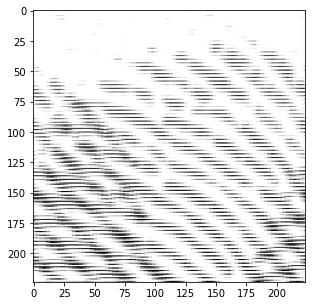

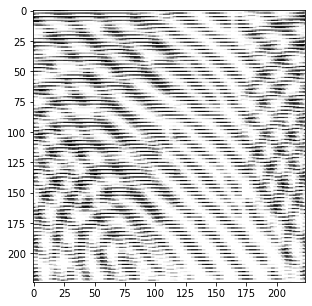

In [49]:
#plt.figure(figsize=[5,5])
    
# Display the first image in training data
for i in range(2):
    plt.figure(figsize=[5, 5])
    curr_img = np.reshape(images_arr[i], (224,224))
    plt.imshow(curr_img, cmap='gray')
    plt.show()
   

In [50]:
images_arr = images_arr.reshape(-1, 224,224, 1)

In [51]:
images_arr.shape

(240, 224, 224, 1)

In [52]:
images_arr.dtype

dtype('float32')

In [53]:
np.max(images_arr)

1.0

In [54]:
images_arr = images_arr / np.max(images_arr)

In [55]:
np.max(images_arr), np.min(images_arr)

(1.0, 0.003937008)

In [56]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_ground,valid_ground = train_test_split(images_arr,
                                                             images_arr,
                                                             test_size=0.2,
                                                             random_state=13)

In [57]:
batch_size = 128
epochs = 2
inChannel = 1
x, y = 224, 224
input_img = Input(shape = (x, y, inChannel))

In [95]:
def autoencoder(input_img):
    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)

    #decoder
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 128
    up1 = UpSampling2D((2,2))(conv4) # 14 x 14 x 128
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 64
    up2 = UpSampling2D((2,2))(conv5) # 28 x 28 x 64
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1
    return decoded

In [96]:
autoencoder = Model(input_img, autoencoder(input_img))
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())


In [97]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 conv2d_12 (Conv2D)          (None, 224, 224, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 56, 56, 128)       7385

In [61]:
autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_ground))

Epoch 1/2
2/2 [==============================] - 40s 15s/step - loss: 0.1484 - val_loss: 0.0789
Epoch 2/2
2/2 [==============================] - 40s 15s/step - loss: 0.0722 - val_loss: 0.0784


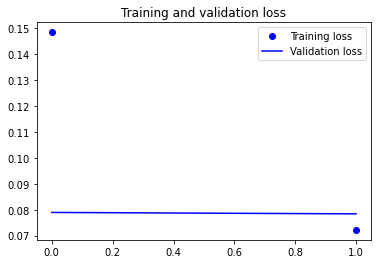

In [98]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(2)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [99]:
 autoencoder =autoencoder.save_weights('autoencoder.h5')


In [64]:
autoencoder = Model(input_img, autoencoder(input_img))

TypeError: 'NoneType' object is not callable

In [65]:
autoencoder.load_weights('autoencoder.h5')

AttributeError: 'NoneType' object has no attribute 'load_weights'

In [66]:
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())

AttributeError: 'NoneType' object has no attribute 'compile'

In [67]:
pred = autoencoder.predict(valid_X)

AttributeError: 'NoneType' object has no attribute 'predict'

Test Images


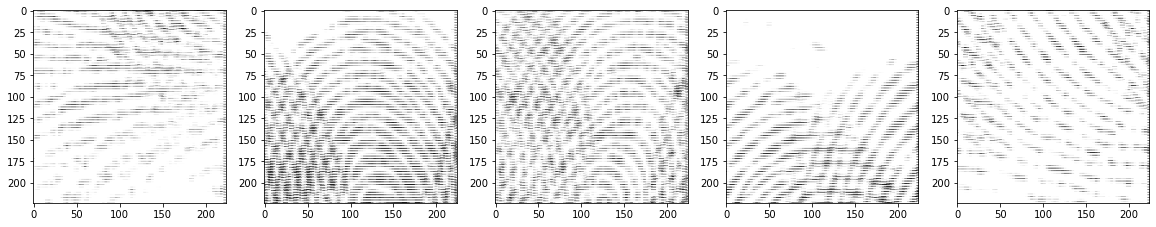

Reconstruction of Test Images


NameError: name 'pred' is not defined

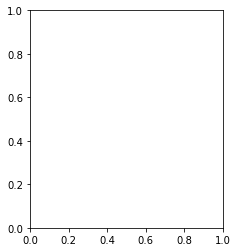

In [68]:
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(valid_ground[i, ..., 0], cmap='gray')
plt.show()    
plt.figure(figsize=(20, 4))
print("Reconstruction of Test Images")
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(pred[i, ..., 0], cmap='gray')  
plt.show()

In [69]:
sec = glob('Secugen/*')

In [70]:
images = []
def read_images(data):
    for i in range(len(data)):
        img = misc.imread(data[i])
        img = misc.imresize(img,(224,224))
        images.append(img)
    return images

In [71]:
images = read_images(sec)

In [72]:
secugen = np.asarray(images)
secugen = secugen.astype('float32')

In [73]:
images_arr.shape

(240, 224, 224, 1)

In [74]:
secugen = secugen / np.max(secugen)

ValueError: zero-size array to reduction operation maximum which has no identity

In [75]:
secugen = secugen.reshape(-1, 224,224, 1)

In [76]:
pred = autoencoder.predict(secugen)

AttributeError: 'NoneType' object has no attribute 'predict'

Test Secugen Images


IndexError: index 0 is out of bounds for axis 0 with size 0

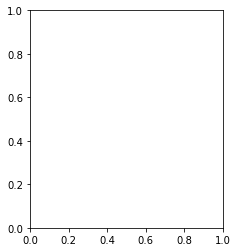

In [77]:
plt.figure(figsize=(20, 4))
print("Test Secugen Images")
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(secugen[i, ..., 0], cmap='gray')
plt.show()    
plt.figure(figsize=(20, 4))
print("Reconstruction of Test Secugen Images")
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(pred[i, ..., 0], cmap='gray')  
plt.show()

In [78]:
lum = glob('Lumidigm/*')

In [79]:
images = []
def read_images(data):
    for i in range(len(data)):
        img = misc.imread(data[i])
        img = misc.imresize(img,(224,224))
        images.append(img)
    return images

In [80]:
images = read_images(lum)

In [81]:
lumidigm = np.asarray(images)
lumidigm = lumidigm.astype('float32')

In [82]:
lumidigm.shape

(0,)

In [83]:
lumidigm = lumidigm / np.max(lumidigm)

ValueError: zero-size array to reduction operation maximum which has no identity

In [84]:
lumidigm = lumidigm.reshape(-1, 224,224, 1)

In [85]:
pred = autoencoder.predict(lumidigm)

AttributeError: 'NoneType' object has no attribute 'predict'

Test Lumidigm Images


IndexError: index 0 is out of bounds for axis 0 with size 0

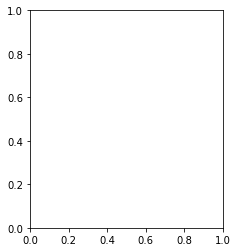

In [86]:
plt.figure(figsize=(20, 4))
print("Test Lumidigm Images")
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(lumidigm[i, ..., 0], cmap='gray')
plt.show()    
plt.figure(figsize=(20, 4))
print("Reconstruction of Test Lumidigm Images")
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(pred[i, ..., 0], cmap='gray')  
plt.show()